<h1 style="color:Green;">Week 3 Lab - due by 24th July, 2022 (11:59 pm CST )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_n1rKmuN1fnPN-HWJTYn4zPI4bsTCCEGI8HsmDpRSkc/edit#slide=id.g11b032e97d3_0_0">[Week 3 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to implement machine learning methods and models on regression problems</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [28]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2 style="color:Green;">Problem 1: Economic vs Market Cycles</h2><br/>

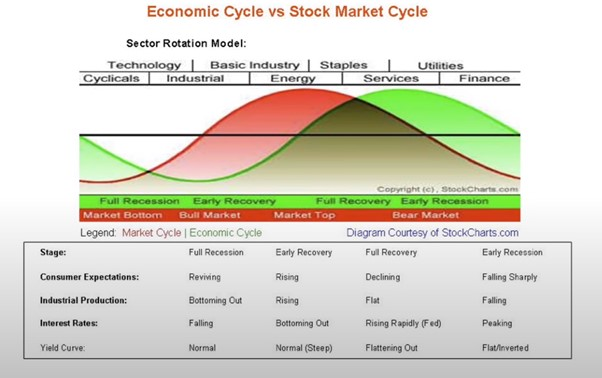

Gross Domestic Products (GDP) growth has been a hot topic in macroeconomics and an economist on your team needs your help to uncover its implications from a statistical learning perspective. The economist gathered some data from the U.S. Bureau of Economic Analysis (BEA) and OECD’s Composite Leading Indicators (CLIs) repositories. The U.S. BEA stores macro and micro-economic measures on a multinational level as the OECD CLIs screens the conditions that dictates the economic booms and busts of OECD countries. <br><br>

4 indictors are gathered from each of the 10 selected OECD countries: monthly real income, employment, industrial production, and wholesale-retail sales. The countries include the United States, United Kingdom, Netherlands, Luxembourg, Japan, Korea, Germany, France, Denmark, and Canada. The indicators are collected over the past 240 months (20 years), from October 1999 to September 2019, so there is a total of 2400 observations. <br><br>

The economist wants to examine the predictive power of these features in a linear model that forecasts the real Gross Domestic Products (GDP) growth rate. 

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [2]:
# loading the csv data set from local directory
OECD = pd.read_csv('OECD_DATA.csv'); OECD = OECD.set_index('Date')
# converting real GDP index to growth rate (we do not take the log this time)
OECD['realGDP'] = OECD['realGDP'].pct_change()
# drop NaN values
OECD = OECD.dropna()
OECD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 11/1/1999 to 9/1/2019
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2399 non-null   object 
 1   realGDP      2399 non-null   float64
 2   realPersInc  2399 non-null   float64
 3   unempRate    2399 non-null   float64
 4   indProd      2399 non-null   float64
 5   retailSales  2399 non-null   float64
dtypes: float64(5), object(1)
memory usage: 131.2+ KB


a) Based on the economist's specified problem, please identify the explanatory and response variables in the data set.

<b style="color:blue;"> Solution: </b>
<p style="color:blue;"> Explanatory variables: country, monthly real income, employment, industrial production, and wholesale-retail sales.</p>
<p style="color:blue;"> Response variable: GDP growth rate</p>

b) To make sure the units of the features are aligned, please standardize the numerical features. (Note we cannot standardize categorical features)

<b style="color:blue;"> Solution: </b>
<p style="color:blue;"> Use the scale function to stanardize explanatory numerical varaibles on a Normal(0,1) scale.</p>

In [3]:
RESPONSE = 'realGDP'
FEATURES = ['realPersInc', 'unempRate', 'indProd', 'retailSales'] # features to be standardized 
OECD.loc[:, FEATURES] = scale(OECD.loc[:, FEATURES]) # standardizing features

c) Notice that since the Country variable is a categoirical variable, we need to use some kind of numeric indicator to replace the string values in that column. We use dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value. For example, we will add 9 columns  to the data set and name column by the syntax 'Country_[country name]'. Each column will only take on the values 0 or 1; 0 represents that the observation on that row does not belong to the country and 1 represents that the observation on that row belongs to the country. For example, the rows where the Country value is USA' will have the Country_USA column being 1, and the Country_Denmark, Country_France, and so on columns being 0. <br><br>

You may ask why we added 9 columns when there are 10 countries in our original data set. This is because when all 9 dummy variables are set to 0, the regression output will represent the result for the country that doesn't have its own added column. <br><br>

Read this blog for more details: https://abbynyakara.medium.com/dummy-variables-in-machine-learning-b3991367bd59
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [5]:
# declaring dummy variables based on the Country column
OECD = pd.get_dummies(data=OECD, drop_first=True)
# update the FEATURES variable
FEATURES = OECD.columns[1:]
# display top rows of the new data set
OECD.head()

realGDP  realPersInc  unempRate   indProd  retailSales  \
Date                                                                 
11/1/1999  0.000988     1.796302  -0.821803 -0.808932    -0.384360   
12/1/1999  0.000691     1.775151  -0.871149 -0.748722    -0.286125   
1/1/2000   0.000592     1.769032  -0.871149 -0.746977    -0.346280   
2/1/2000   0.000591     1.769869  -0.821803 -0.723416    -0.288399   
3/1/2000   0.000690     1.764942  -0.871149 -0.695493    -0.261159   

           Country_Denmark  Country_France  Country_Germany  Country_Japan  \
Date                                                                         
11/1/1999                0               0                0              0   
12/1/1999                0               0                0              0   
1/1/2000                 0               0                0              0   
2/1/2000                 0               0                0              0   
3/1/2000                 0               0                0              0   

           Country_Korea  Country_Luxembourg  Country_Netherlands  Country_UK  \
Date                                                                            
11/1/1999              0                   0                    0           0   
12/1/1999              0                   0                    0           0   
1/1/2000               0                   0                    0           0   
2/1/2000               0                   0                    0           0   
3/1/2000               0                   0                    0           0   

           Country_USA  
Date                    
11/1/1999            1  
12/1/1999            1  
1/1/2000             1  
2/1/2000             1  
3/1/2000             1

Please run the above code chunk an observe that the new columns are added to the original data frame to represent the dummy variables. <br><br>
Now, please write a code piece to split the data into 75% training and 25% testing sets.

<b style="color:blue;"> Solution: </b>
<p style="color:blue;"> Use the train_test_split function imported to split the data.</p>

In [19]:
################ EDIT CODE LINES HERE #################

X_train, X_test, y_train, y_test = train_test_split(OECD.loc[:, FEATURES], OECD.loc[:, RESPONSE], test_size=0.25, random_state=0)

######################################################

d) We are told by the economist that all the features are very important predictors for the GDP growth rate, and hence, we will take his words and skip the exploration of importance scores. He also mentions that there is no multicollinearity based on his initial analysis. <br><br> 
Please validate the economist's statements, in other words, show that:
<ul>
  <li>All the features (excluding the dummy variables) are important</li>
  <li>No multicollinearity exists between features </li>
</ul>
To respect the economist's claims, please DO NOT drop any features. (Hint: the dummy variables should not be significant)

<b style="color:blue;"> Solution: </b>
<p style="color:blue;"> Use the Random Forest Regressor to calculate feature importance scores. </p>
<p style="color:blue;"> We found that the 4 economic indicators all have importance scores above 0.05, showing significance. The dummy variables all show importance scores below 0.05, which in theory is insignificant, but to respect the economist's claims we do not drop them.</p>

Text(0.5, 0, 'Relative Importance')

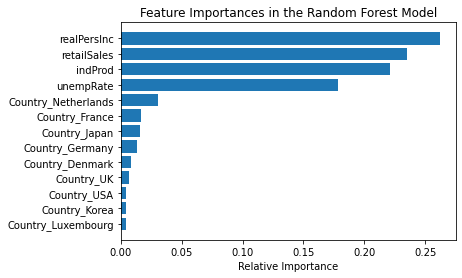

In [22]:
################ EDIT CODE LINES HERE #################

from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

# sort and plot the features by their importance scores
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

######################################################

<p style="color:blue;"> We use VIF to test for multicollinearity between features, and found that all features have VIF values around 1 or 2, hence showing low to moderate correlations. It is safe not to drop any features. </p>

In [23]:
################ EDIT CODE LINES HERE #################

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(OECD.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]
VIF_table = pd.DataFrame({'Features': FEATURES, 'VIF': VIF})
VIF_table

######################################################

Features       VIF
0           realPersInc  1.723912
1             unempRate  2.435666
2               indProd  2.242862
3           retailSales  2.094585
4       Country_Denmark  1.166142
5        Country_France  1.891253
6       Country_Germany  1.134902
7         Country_Japan  1.186148
8         Country_Korea  1.977866
9    Country_Luxembourg  1.411761
10  Country_Netherlands  1.118034
11           Country_UK  1.036900
12          Country_USA  1.026931

e) Please wirte a code piece to fit a multiple linear regression to the data, then print the resulting R-squared, MAE, and RMSE metrics. 

<b style="color:blue;"> Solution: </b>

In [42]:
################ EDIT CODE LINES HERE #################

linear_model = LinearRegression()

#fit regression model
linear_model = linear_model.fit(X_train, y_train)

# calculating goodness of fit metrics
y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# printing goodness of fit metrics
print('The Adjusted R-squared is: ', 1-(1-r2)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae)
print('The RMSE is: ', rmse)

######################################################

The Adjusted R-squared is:  -0.00016040239222148145
The MAE is:  0.0011117728989690704
The RMSE is:  0.0015994744800071979


f) Please wirte a code piece to fit a ridge regression to the data, then print the resulting R-squared, MAE, and RMSE metrics.

<b style="color:blue;"> Solution: </b>

In [43]:
################ EDIT CODE LINES HERE #################

# initiate the 5-Fold cross validation 
ridge_model = RidgeCV(cv=5, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(X_train, y_train)

# calculating model metrics
y_test_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_ridge)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_ridge)
print('The RMSE is: ', rmse_ridge)

######################################################

The Adjusted R-squared is:  -0.0011210804926706786
The MAE is:  0.0011116109555797656
The RMSE is:  0.0016002424624718444


g) Please wirte a code piece to fit a lasso regression to the data, then print the resulting R-squared, MAE, and RMSE metrics.

<b style="color:blue;"> Solution: </b>

In [44]:
################ EDIT CODE LINES HERE #################

# initiate 5-Fold cross validation 
lasso_model = LassoCV(cv=5) # uses scoring='r2'by default
# fit the model with the best alpha
lasso_model = lasso_model.fit(X_train, y_train)

# calculating model metrics
y_test_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_lasso)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_lasso)
print('The RMSE is: ', rmse_lasso)

######################################################

The Adjusted R-squared is:  -0.0016100473091211764
The MAE is:  0.0011125699424768829
The RMSE is:  0.0016006332093845773


h) Compare the three models you just fitted. Which one turns out to be the best and why? (Hint: since we included 10 dummy variables in the model that are not as significant, we may be overfitting, hence leading to a negative adjusted R-squared. You can ignore the adjusted R-squared in this case, and just compare the MAE and RMSE.)

<p style="color:blue;"> Based on MAE, ridge regression performs the best. However, based on RMSE, the multiple linear regression without regression performs the best. You get full credits if you select either model. </p>

i) Based on the model you selected, write a code piece that prints the intercept and coefficient estimates, then write out the formula based on the printed output.

<p style="color:blue;"> For the unregularized multiple linear regression, </p>
$\hat{y}$ = -0.00020 + 0.00011 * (realPersInc) + 0.00037 * (unempRate) + 0.00022 * (indProd) + 0.000019 * (retailSales) + 0.000082 * (Country_Denmark) - 0.00047 * (Country_France) - 0.000053 * (Country_Germany) + 0.00038 * (Country_Japan) + 0.00094 * (Country_Korea) + 0.00032 * (Country_Luxembourg) + 0.00020 * (Country_Netherlands) + 0.000097 * (Country_UK)+ 0.00025 * (Country_USA)

In [45]:
################ EDIT CODE LINES HERE #################
print('intercept:', linear_model.intercept_)
print('coefficient:', linear_model.coef_)
################ EDIT CODE LINES HERE #################

intercept: -0.0002038638395117495
coefficient: [ 1.05993564e-04  3.74296397e-04  2.19173918e-04  1.88501122e-05
  8.18097003e-05 -4.74259565e-04 -5.29082145e-05  3.77789866e-04
  9.39144404e-04  3.24067560e-04  2.02917379e-04  9.73525532e-05
  2.50596174e-04]


<p style="color:blue;"> For the ridge regression, </p>
$\hat{y}$ = -0.000012 + 0.000093 * (realPersInc) + 0.00033 * (unempRate) + 0.00019 * (indProd) + 0.000016 * (retailSales) + 0.000014 * (Country_Denmark) -0.00044 * (Country_France) - 0.00012 * (Country_Germany) + 0.00025 * (Country_Japan) + 0.00072 * (Country_Korea) + 0.00021 * (Country_Luxembourg) + 0.000099 * (Country_Netherlands)+ 0.000020 * (Country_UK)+ 0.00015 * (Country_USA)

In [46]:
################ EDIT CODE LINES HERE #################
print('intercept:', ridge_model.intercept_)
print('coefficient:', ridge_model.coef_)
################ EDIT CODE LINES HERE #################

intercept: -0.0001199956896715008
coefficient: [ 9.32217522e-05  3.26494582e-04  1.89817546e-04  1.57395382e-05
  1.44982390e-05 -4.43385299e-04 -1.21744455e-04  2.52680196e-04
  7.24458220e-04  2.08296903e-04  9.93136904e-05  2.04885952e-05
  1.52207985e-04]
